# Example Prediction Temperature Working on First Month To Predict The temperature of Weekly Nasa Dataset

In [1]:
import pandas as pd
data = pd.read_csv('Monthone.csv')
data.columns

Index(['ALLSKY_KT', 'WS2M', 'T2M', 'PS', 'WS10M', 'QV2M', 'RH2M'], dtype='object')

In [2]:
data.shape

(1209, 7)

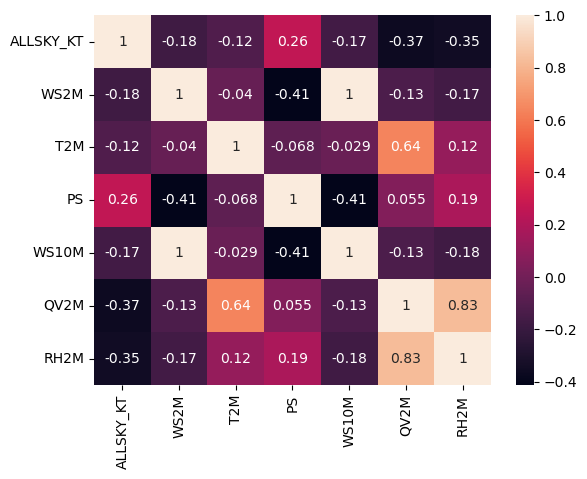

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [4]:
data.head(5)

,ALLSKY_KT,WS2M,T2M,PS,WS10M,QV2M,RH2M
0,-0.090677,0.516888,9.431681,-0.991191,0.513828,3.112841,-13.116381
1,-0.070677,0.686889,9.591681,-1.181191,0.673828,3.172841,-14.236381
2,-0.040677,-0.913111,9.951681,-0.901191,-1.226172,3.422841,-12.116381
3,-0.030677,-0.933111,10.311681,-0.081191,-1.336172,4.032841,-5.296381
4,0.389323,-1.703111,11.081681,0.118809,-2.306172,3.542841,-13.116381


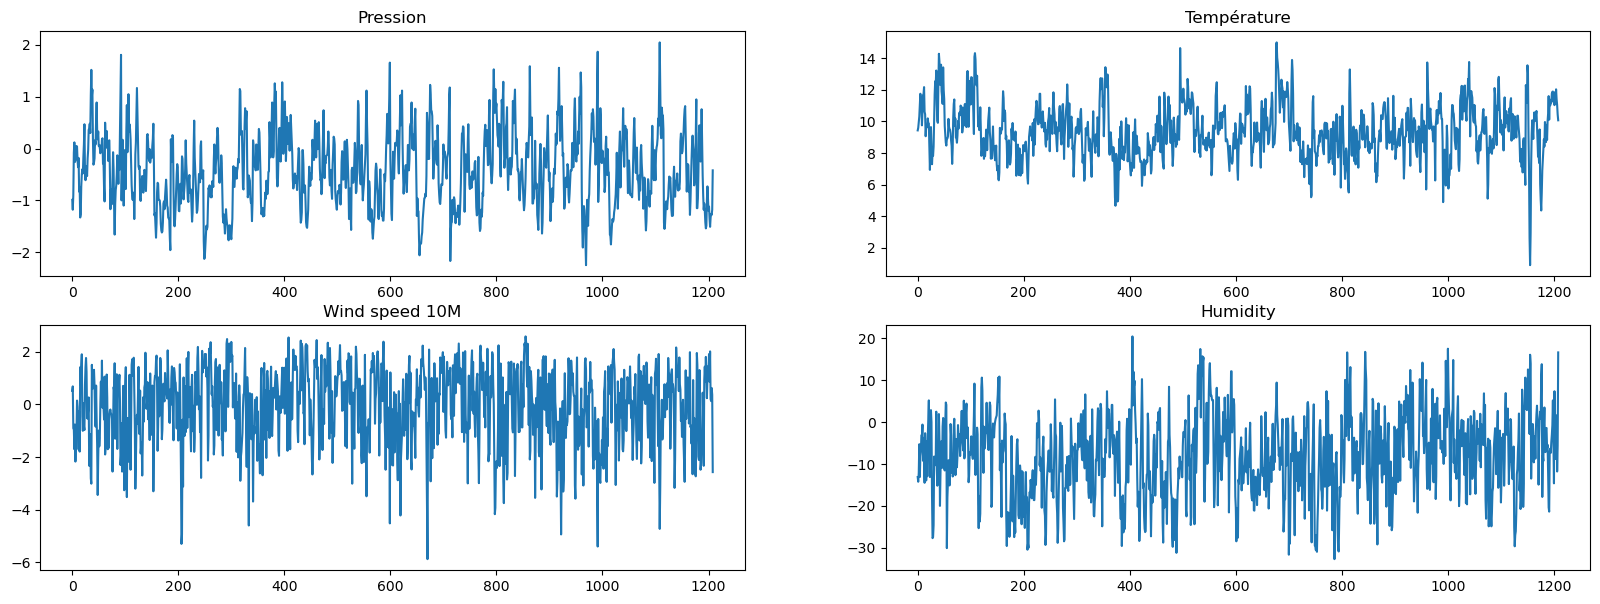

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,7))
# Évolution de la pression
ax1 = fig.add_subplot(221)
plt.plot(data['PS'])
ax1.title.set_text('Pression')
# Évolution de la température
ax2 = fig.add_subplot(222)
plt.plot(data['T2M'])
ax2.title.set_text('Température')
# Évolution de la vont
ax3 = fig.add_subplot(223)
plt.plot(data['WS2M'])
ax3.title.set_text('Wind speed 10M')
# Évolution du déficit de himidité de vapeur
ax4 = fig.add_subplot(224)
plt.plot(data['RH2M'])
ax4.title.set_text('Humidity')
# Evolution de radation
#ax5 = fig.add_subplot(225)
#plt.plot(data['Radiation'])
#ax5.title.set_text('Radation')

plt.show()

In [6]:
split_fraction = 0.80
split_idx = int(split_fraction * len(data))
# Train: on conserve les 80% premières lignes
train_data = data.loc[0:split_idx-1].values
# Test: on conserve les 20% dernières lignes
val_data = data.loc[split_idx:].values
print(f"Jeu d'apprentissage : {train_data.shape}, jeu d'évaluation : {val_data.shape}")

Jeu d'apprentissage : (967, 7), jeu d'évaluation : (242, 7)


### Train The NN and obtimise with descente de gradient

In [7]:
# Importation 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib as plt

In [8]:
# Création du jeu d'entraînement
sampling_rate = 1 # Fréquence d'échantillonnage
sequence_length = 120  # Longueur de la séquence
batch_size = 256 # Taille de batch

# Création du jeu d'entraînement: contient Temperature, Pressure, Humidity, WindSpeed, day length
X_train = tf.keras.utils.timeseries_dataset_from_array(
    data=train_data[:, (0,1,3,4,5,6)],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

y_train = tf.keras.utils.timeseries_dataset_from_array(
    data=train_data[:, 2],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

dataset_train = tf.data.Dataset.zip((X_train, y_train))
# Création du jeu d'évaluation

X_val = tf.keras.utils.timeseries_dataset_from_array(
    data=val_data[:, (0,1,3,4,5,6)],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

y_val = tf.keras.utils.timeseries_dataset_from_array(
    data=val_data[:, 2],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

dataset_val = tf.data.Dataset.zip((X_val, y_val))

# Training The RNN To Predict First Month

In [9]:
# from tensorflow import keras

dimension = train_data.shape[1]-1
inputs = keras.layers.Input(shape=(sequence_length, dimension))
gru_out = keras.layers.GRU(dimension, return_sequences=True)(inputs)
dense_out = keras.layers.Dense(dimension, activation='relu')(gru_out)
outputs = keras.layers.Dense(1)(dense_out)

model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
learning_rate = 0.001
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 6)]          0         
                                                                 
 gru (GRU)                   (None, 120, 6)            252       
                                                                 
 dense (Dense)               (None, 120, 6)            42        
                                                                 
 dense_1 (Dense)             (None, 120, 1)            7         
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs = 100
model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
)

Epoch 1/100
4/4 [==============================] - 5s 366ms/step - loss: 84.9724 - val_loss: 89.3718
Epoch 2/100
4/4 [==============================] - 0s 99ms/step - loss: 83.3888 - val_loss: 87.7453
Epoch 3/100
4/4 [==============================] - 0s 93ms/step - loss: 81.8030 - val_loss: 86.1062
Epoch 4/100
4/4 [==============================] - 0s 100ms/step - loss: 80.2102 - val_loss: 84.4513
Epoch 5/100
4/4 [==============================] - 0s 99ms/step - loss: 78.6068 - val_loss: 82.7858
Epoch 6/100
4/4 [==============================] - 0s 109ms/step - loss: 76.9951 - val_loss: 81.1089
Epoch 7/100
4/4 [==============================] - 0s 105ms/step - loss: 75.3743 - val_loss: 79.4205
Epoch 8/100
4/4 [==============================] - 0s 96ms/step - loss: 73.7422 - val_loss: 77.7216
Epoch 9/100
4/4 [==============================] - 0s 103ms/step - loss: 72.0983 - val_loss: 76.0124
Epoch 10/100
4/4 [==============================] - 0s 104ms/step - loss: 70.4417 - val_loss: 7

4/4 [==============================] - 0s 101ms/step - loss: 3.3746 - val_loss: 4.0527
Epoch 83/100
4/4 [==============================] - 0s 98ms/step - loss: 3.3211 - val_loss: 3.9859
Epoch 84/100
4/4 [==============================] - 0s 93ms/step - loss: 3.2733 - val_loss: 3.9255
Epoch 85/100
4/4 [==============================] - 0s 94ms/step - loss: 3.2308 - val_loss: 3.8707
Epoch 86/100
4/4 [==============================] - 0s 100ms/step - loss: 3.1929 - val_loss: 3.8211
Epoch 87/100
4/4 [==============================] - 0s 95ms/step - loss: 3.1593 - val_loss: 3.7761
Epoch 88/100
4/4 [==============================] - 0s 93ms/step - loss: 3.1294 - val_loss: 3.7354
Epoch 89/100
4/4 [==============================] - 0s 100ms/step - loss: 3.1029 - val_loss: 3.6985
Epoch 90/100
4/4 [==============================] - 0s 91ms/step - loss: 3.0793 - val_loss: 3.6650
Epoch 91/100
4/4 [==============================] - 0s 100ms/step - loss: 3.0585 - val_loss: 3.6346
Epoch 92/100
4/4 [=

In [12]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import scatter
def show_plot(predicted_data, true_data):
    plt.title('Prédiction synchrone')
    plt.plot(predicted_data, "rx", label="Temperature prédite")
    plt.plot(true_data, ".-", label="Vraie Temperature")
    plt.legend()
    plt.xlabel("Pas de temps")
    plt.show()
    return

4/4 [==============================] - 0s 16ms/step


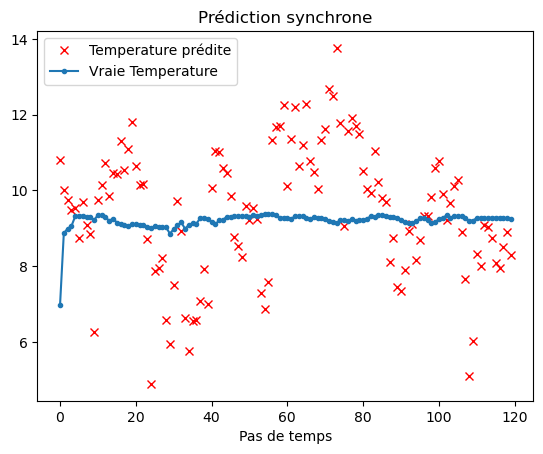

In [15]:
for x, y in dataset_val.take(3):
     show_plot(y[0].numpy(), model.predict(x)[0])

In [16]:
mean_absolute_error = tf.keras.losses.MeanAbsoluteError()
error = 0

for x, y in dataset_val:
    y_pred = model(x)
    error += mean_absolute_error(y, y_pred).numpy()

print(f"Erreur absolue moyenne : {error/len(dataset_val):.5f}")


Erreur absolue moyenne : 1.42441


## Prédiction de la température future

In [31]:
past_length = 120
future_step = 1

label_start = past_length + future_step  # Début de la séquence des labels
label_end = label_start + split_idx  # Fin de la séquence des labels

x_train = train_data
y_train = data[label_start:label_end][['T2M']]

x_end = len(val_data) - past_length - future_step # Fin de la séquence des données d'entrées en validation

label_start = split_idx + past_length + future_step # Début de la séquence des labels en validation
x_val = val_data[:x_end]
y_val = data[label_start:][['T2M']]

In [32]:
batch_size = 256
step_size = 1 # Facteur d'échantillonnage
sequence_length = int(past_length / step_size)

dataset_train = tf.keras.utils.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step_size,
    batch_size=batch_size,
)

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step_size,
    batch_size=batch_size,
)

In [33]:
learning_rate = 0.001

input_dim = train_data.shape[1]
hidden_dim = 32
inputs = keras.layers.Input(shape=(sequence_length, input_dim))
gru_out = keras.layers.GRU(hidden_dim)(inputs)
dense_out = keras.layers.Dense(hidden_dim, activation='relu')(gru_out)
outputs = keras.layers.Dense(1)(dense_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 gru_6 (GRU)                 (None, 32)                3936      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [34]:
epochs = 50

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
)

Epoch 1/50
4/4 [==============================] - 4s 357ms/step - loss: 86.4678 - val_loss: 134.1197
Epoch 2/50
4/4 [==============================] - 1s 134ms/step - loss: 78.9435 - val_loss: 124.8452
Epoch 3/50
4/4 [==============================] - 1s 139ms/step - loss: 72.4048 - val_loss: 116.7385
Epoch 4/50
4/4 [==============================] - 1s 132ms/step - loss: 66.4102 - val_loss: 108.3893
Epoch 5/50
4/4 [==============================] - 1s 141ms/step - loss: 60.4978 - val_loss: 99.0788
Epoch 6/50
4/4 [==============================] - 1s 141ms/step - loss: 54.4881 - val_loss: 89.7390
Epoch 7/50
4/4 [==============================] - 1s 135ms/step - loss: 48.3340 - val_loss: 80.8065
Epoch 8/50
4/4 [==============================] - 1s 135ms/step - loss: 42.0925 - val_loss: 72.0483
Epoch 9/50
4/4 [==============================] - 1s 129ms/step - loss: 35.8823 - val_loss: 63.4550
Epoch 10/50
4/4 [==============================] - 1s 129ms/step - loss: 29.8275 - val_loss: 55.

In [35]:
def show_plot(sequence, prediction, ground_truth, delta=future_step/step_size, title=None):
    plt.title(title)
    plt.plot(sequence.flatten(), ".-", label="Temperature")
    plt.plot(len(sequence) + delta, prediction, "go", label="Prédiction")
    plt.plot(len(sequence) + delta, ground_truth, "rx", label="Vraie Temperature")
    plt.legend()
    plt.xlim(-1, len(sequence) + delta + 3)
    plt.xlabel("Pas de temps")
    plt.show()

1/1 [==============================] - 0s 464ms/step


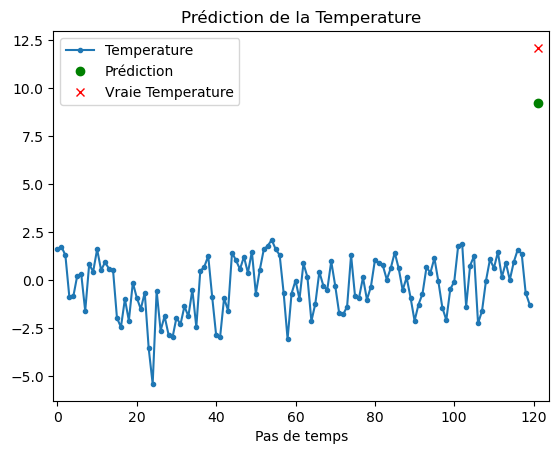

In [36]:
for x, y in dataset_val.take(5):
    show_plot(x[0][:, 1].numpy(), model.predict(x)[0], y[0].numpy(), title="Prédiction de la Temperature")

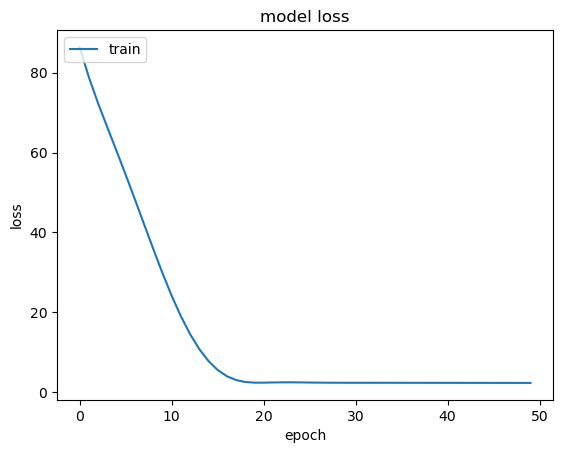

In [37]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()